# Notebook n.3 
### NYC complaints 311 Calls

In this notebook you are asked to perform data analysis on a dataset of calls to 311 (municipal calls, not emergency) in the New York City area.

Get the data:
   * A compressed smaller version (~100 MB compressed) can be found [here](https://bit.ly/3b7yATT)
   * If you want (and have enough memory on your laptop), you can download the original data from [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) (11Gb+... Go to Export -> CSV).

## Instructions:
   * The small dataset is enough to finish this notebook.
   * For each question, add as many code cells as you need, as well as Markdown cells to explain your thought process and answer in text to the questions (where needed).

In [1]:
# Run this cell to import commonly used modules
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)  # large and nice

### <a id="point1">1.</a> Load the `csv` file into a `pandas.dataframe` called `complaints`

In [2]:
complaints = pd.read_csv('./311_small.csv')
complaints.head()

C:\Users\Polytech\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,31,32,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38039130,12/28/2017 02:07:27 AM,01/25/2018 04:14:40 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11226,2709 CLARENDON ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643087,-73.951445,"(40.64308690933735, -73.95144450750576)"
1,30967332,06/29/2015 12:36:20 PM,07/15/2015 05:09:55 PM,HPD,Department of Housing Preservation and Develop...,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38039132,12/28/2017 11:52:50 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Residential Building,11211,201 SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710881,-73.960160,"(40.71088069563202, -73.96016023399284)"
3,38039134,12/28/2017 10:55:57 AM,01/03/2018 09:32:26 AM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,10032,533 WEST 158 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833931,-73.942611,"(40.83393089963924, -73.94261063910199)"
4,38039147,12/28/2017 05:45:06 PM,01/02/2018 02:00:17 PM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,10303,6 MACORMAC PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636605,-74.168744,"(40.63660544008755, -74.16874421913744)"


### 2. Basic overview

   * How many rows?
   * How many columns?
   * Type of each column
   * Number of unique values per column
   * Show the first 5 rows
   * [Earlier](#point1) you probably received a warning. If so, why? Investigate (type mismatch, nans, ...)

1- The number of rows are 999999 and the number of columns are 41

In [3]:
index = complaints.index
number_of_rows = len(index)
number_of_rows

999999

In [4]:
complaints.shape

(999999, 41)

2- Type of each column 

In [5]:
complaints.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

3- Number of unique values per column

In [6]:
complaints.nunique()

Unique Key                        999999
Created Date                      776536
Closed Date                       400907
Agency                                29
Agency Name                          503
Complaint Type                       253
Descriptor                          1194
Location Type                        147
Incident Zip                         748
Incident Address                  301977
Street Name                        13127
Cross Street 1                     14936
Cross Street 2                     15088
Intersection Street 1               9567
Intersection Street 2              10199
Address Type                           6
City                                 324
Landmark                            2597
Facility Type                          4
Status                                 9
Due Date                          376211
Resolution Description               903
Resolution Action Updated Date    399139
Community Board                       77
BBL             

4- Show the first 5 rows

In [7]:
complaints.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38039130,12/28/2017 02:07:27 AM,01/25/2018 04:14:40 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11226,2709 CLARENDON ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643087,-73.951445,"(40.64308690933735, -73.95144450750576)"
1,30967332,06/29/2015 12:36:20 PM,07/15/2015 05:09:55 PM,HPD,Department of Housing Preservation and Develop...,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38039132,12/28/2017 11:52:50 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Residential Building,11211,201 SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710881,-73.960160,"(40.71088069563202, -73.96016023399284)"
3,38039134,12/28/2017 10:55:57 AM,01/03/2018 09:32:26 AM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,10032,533 WEST 158 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833931,-73.942611,"(40.83393089963924, -73.94261063910199)"
4,38039147,12/28/2017 05:45:06 PM,01/02/2018 02:00:17 PM,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,10303,6 MACORMAC PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636605,-74.168744,"(40.63660544008755, -74.16874421913744)"


5- you probably received a warning. If so, why?

In the dataset, the type of some columns is not defined properly as data type.

_for example:_
the **incident zip** is defined as "object" while it has to be a "float"

### 3. Show the top 10 rows for attributes `Complaint Type` and `Borough`

In [8]:
(complaints[['Complaint Type','Borough']]).head(10)

,Complaint Type,Borough
0,HEAT/HOT WATER,BROOKLYN
1,HPD Literature Request,Unspecified
2,Smoking,BROOKLYN
3,Sidewalk Condition,MANHATTAN
4,Damaged Tree,STATEN ISLAND
5,Street Condition,BRONX
6,Street Condition,STATEN ISLAND
7,Street Condition,STATEN ISLAND
8,Street Light Condition,BROOKLYN
9,General Construction/Plumbing,QUEENS


### 4. How many distinct `Complaint Type` are there?
   * Count them and show them

In [9]:
complaints['Complaint Type'].nunique() #count number of distinct complaints 

253

In [10]:
complaints['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'HPD Literature Request', 'Smoking',
       'Sidewalk Condition', 'Damaged Tree', 'Street Condition',
       'Street Light Condition', 'General Construction/Plumbing',
       'Plumbing', 'Curb Condition', 'Animal Abuse',
       'Non-Residential Heat', 'Electronics Waste',
       'Traffic Signal Condition', 'Water System', 'APPLIANCE',
       'DOOR/WINDOW', 'Food Poisoning', 'Street Sign - Damaged',
       'Noise - Vehicle', 'Street Sign - Missing', 'Food Establishment',
       'Electrical', 'ELECTRIC', 'New Tree Request', 'Noise',
       'FLOORING/STAIRS', 'GENERAL', 'Root/Sewer/Sidewalk Condition',
       'Dead/Dying Tree', 'DOF Property - Reduction Issue',
       'DOF Property - Payment Issue', 'Traffic', 'Graffiti',
       'DOF Parking - Request Copy', 'SAFETY',
       'DOF Parking - Payment Issue', 'Illegal Parking',
       'DOF Parking - Request Status', 'Broken Muni Meter',
       'Taxi Complaint', 'Noise - Residential', 'Blocked Driveway',
       'Snow',

### <a id="point5">5.</a> Clean `all` lines where `Complaint Type` contains the keyword `"Misc."` 
   * How many lines are dropped?

In [11]:
df= complaints[complaints['Complaint Type'].str.contains("Misc")]
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
291662,38331296,01/29/2018 01:02:11 PM,02/14/2018 12:00:00 AM,DOB,Department of Buildings,Miscellaneous Categories,FDNY Referral - Pilot,NaN,10304,643 RICHMOND ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.611067,-74.088741,"(40.611066889944155, -74.08874100859681)"
328501,38414854,02/07/2018 08:31:01 AM,02/09/2018 12:00:00 AM,DOB,Department of Buildings,Miscellaneous Categories,FDNY Referral - Pilot,NaN,11421,93-30 86 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694856,-73.851948,"(40.6948562543657, -73.85194846508554)"


In [12]:
df.shape #we have 19 rows with the keyword "Misc"

(19, 41)

In [13]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [14]:
complaints= complaints.rename(columns={'Complaint Type':'Complaint_Type'})

In [15]:
df_=complaints[~complaints.Complaint_Type.str.contains("Misc")]
df_.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint_Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38039130,12/28/2017 02:07:27 AM,01/25/2018 04:14:40 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11226,2709 CLARENDON ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643087,-73.951445,"(40.64308690933735, -73.95144450750576)"
1,30967332,06/29/2015 12:36:20 PM,07/15/2015 05:09:55 PM,HPD,Department of Housing Preservation and Develop...,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38039132,12/28/2017 11:52:50 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Residential Building,11211,201 SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710881,-73.960160,"(40.71088069563202, -73.96016023399284)"


#### From now on, use the dataframe resulting from point [5](#point5)

### <a id="point6">6.</a> Count the number of `Complaint Type`
   * Show the top 10 most popular complaint types.
   * Plot the histogram of the 10 most popular complaint types.

_Top 10 the most frequent complaint_ _code bellow_

In [16]:
n = 10
df_['Complaint_Type'].value_counts()[:n].index.tolist()

['HEAT/HOT WATER',
 'Noise - Residential',
 'General Construction/Plumbing',
 'Illegal Parking',
 'Request Large Bulky Item Collection',
 'Blocked Driveway',
 'Street Condition',
 'Water System',
 'Street Light Condition',
 'UNSANITARY CONDITION']

In [17]:
df_new=df_['Complaint_Type'].value_counts()[:10]

In [18]:
df_new

HEAT/HOT WATER                         124358
Noise - Residential                     83272
General Construction/Plumbing           57295
Illegal Parking                         56634
Request Large Bulky Item Collection     54515
Blocked Driveway                        51171
Street Condition                        47301
Water System                            28549
Street Light Condition                  26744
UNSANITARY CONDITION                    25171
Name: Complaint_Type, dtype: int64

<AxesSubplot:ylabel='Frequency'>

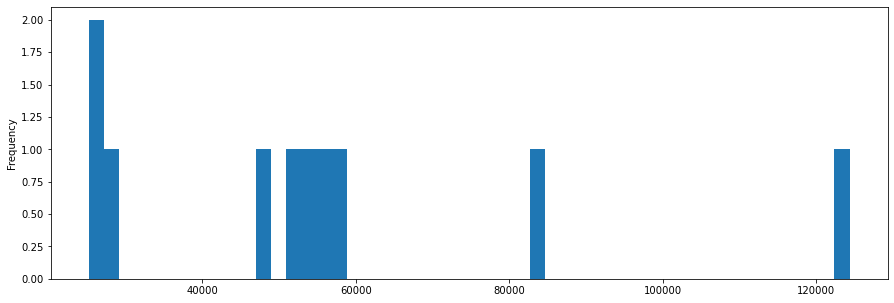

In [19]:
df_new.plot(kind='hist', bins=50)

### 7. Extract all the rows with the Top 1 Complaint Type into a new dataframe
   * Top 1 Complaint Type is the single most popular Complaint Type found in [the previous question](#point6) (from now on `Top1`)
   * Show the top 3 rows of the new dataframe
   * What is the relation between the Top1 Complaint Type and different boroughs?
      * Leave out eventual unspecified data
      * Find the data distribution (i.e., count them)
      * Plot the histogram of the ratio of Top1 over all complaints, per borough.

_Top 1 Complaint Type is the single most popular Complaint_

In [20]:
df_['Complaint_Type'].value_counts()[:1]

HEAT/HOT WATER    124358
Name: Complaint_Type, dtype: int64

_Show the top 3 rows of the new dataframe_

In [25]:
(complaints[complaints['Complaint_Type']=="HEAT/HOT WATER"]).head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint_Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38039130,12/28/2017 02:07:27 AM,01/25/2018 04:14:40 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11226,2709 CLARENDON ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643087,-73.951445,"(40.64308690933735, -73.95144450750576)"
67,38039226,12/28/2017 06:34:15 AM,12/28/2017 09:26:20 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11233,1924 PROSPECT PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.672241,-73.912317,"(40.672240762922904, -73.9123167627338)"
77,38039238,12/28/2017 12:58:15 AM,12/28/2017 02:08:17 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10472,1030 BOYNTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825023,-73.877378,"(40.8250227912721, -73.87737784124917)"
